In [1]:
from src.Sonufy import AudioSpectrogramConverter
import numpy as np
import matplotlib.pyplot as plt

In [8]:
asc = AudioSpectrogramConverter('data', spec_thresh=1, end_freq=8000)

In [9]:
from pyarrow import feather

test_tracks = feather.read_feather('data/all_tracks_shuffled.feather')

In [10]:
links = test_tracks.track_preview_link.reset_index(drop=True)

In [33]:
links = links[~links.isna()]

In [34]:
links[5]

'https://p.scdn.co/mp3-preview/85da3b3f3ff1af5c5bff445654138c918461e742?cid=22c6d4bc654146c681d8501b5a4360c0'

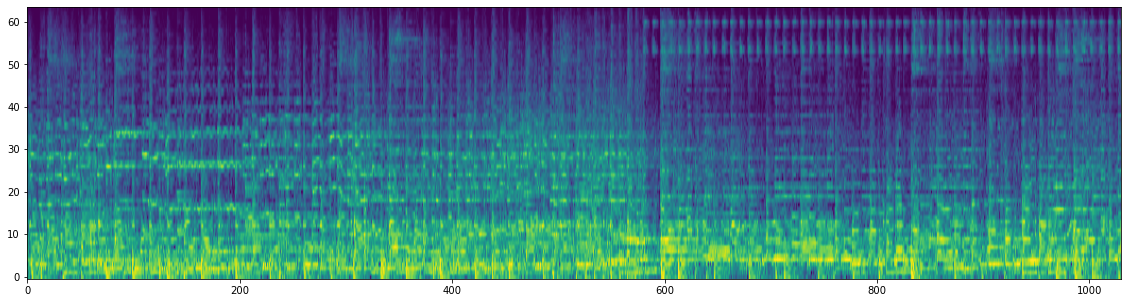

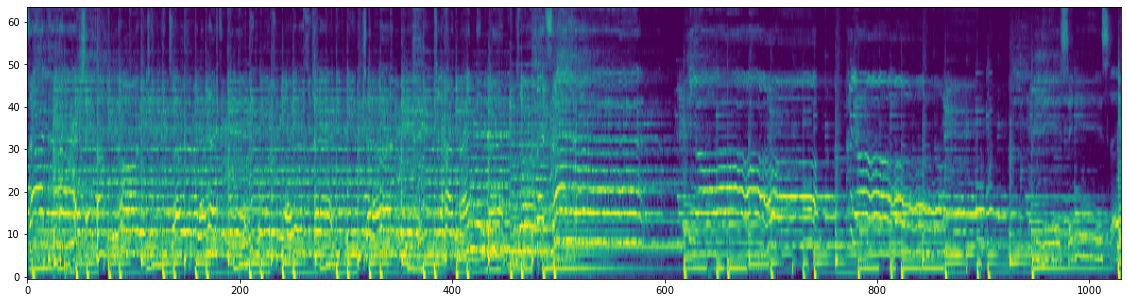

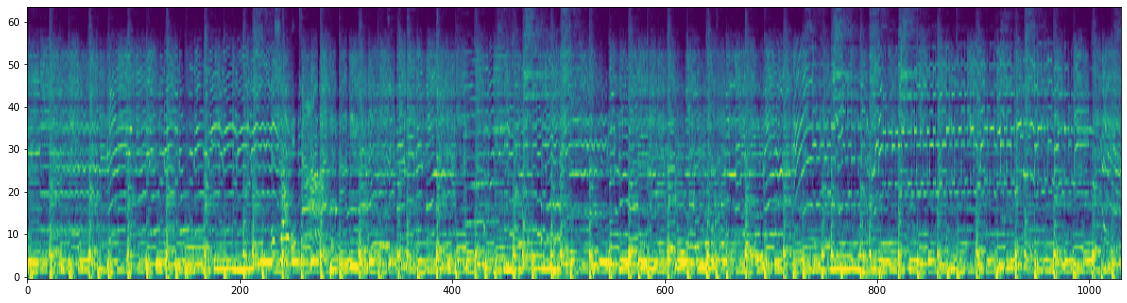

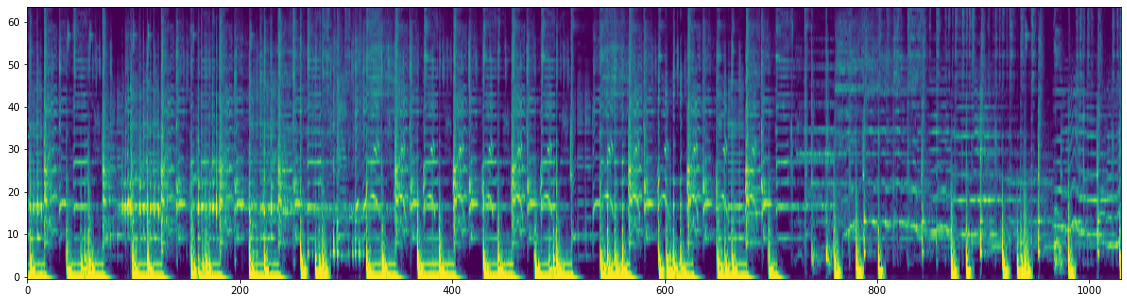

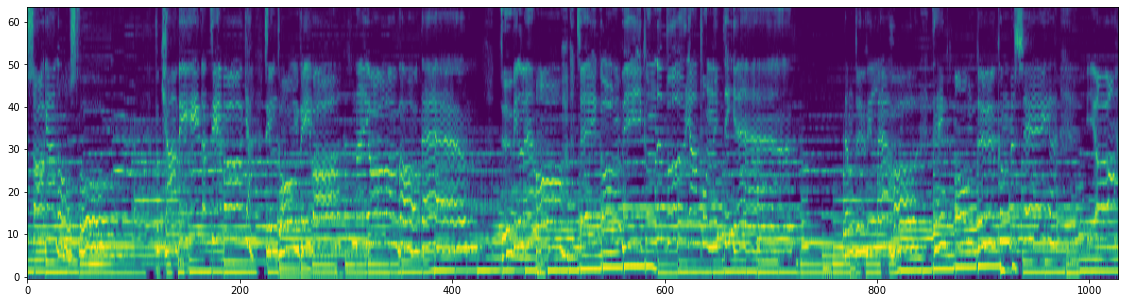

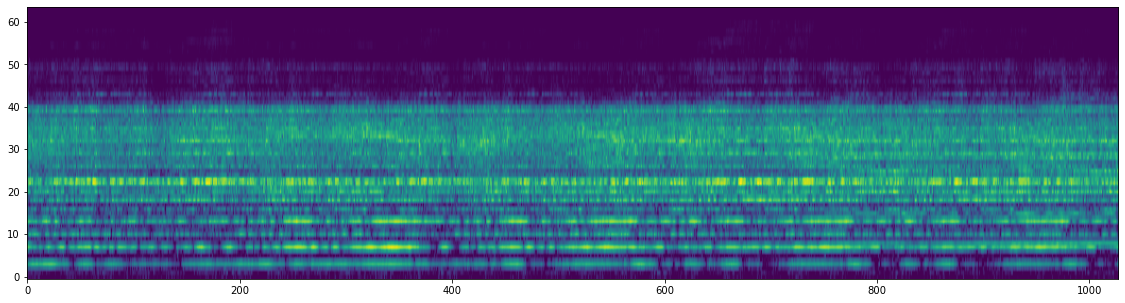

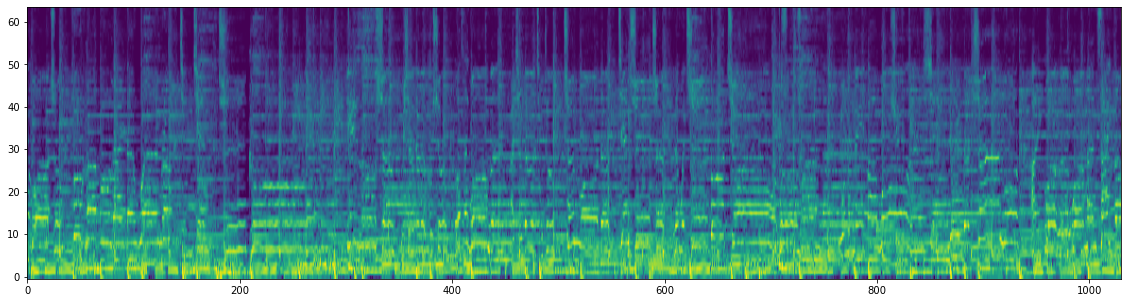

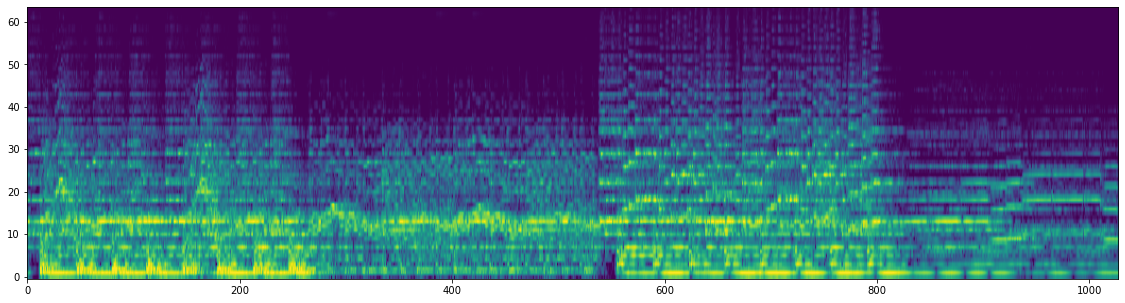

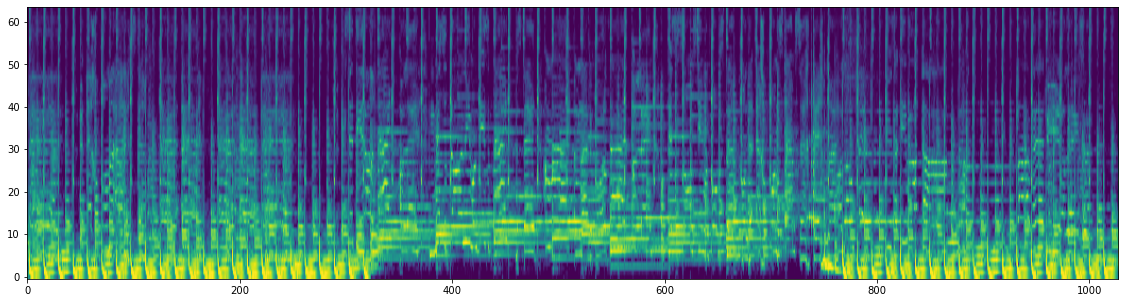

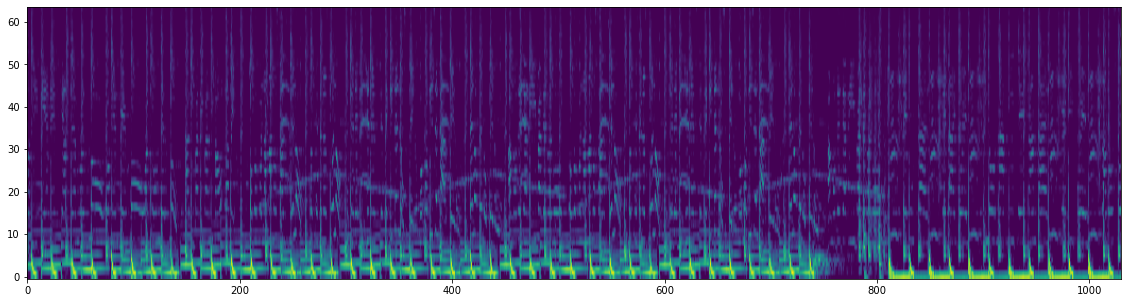

KeyboardInterrupt: 

In [47]:
results = []
for i in range(30):
    test = asc.convert(links[i], file_id=0, save=False, scale=False, log=False)
    test = np.maximum(test, 1)
    log_spec = (20.0 * np.log10(np.maximum(1e-10, test)))/50
    log_spec = np.minimum(log_spec, 1)
    plt.figure(figsize=(20,5))
    plt.imshow(log_spec, origin='lower', aspect=4)
    plt.show()
    logmax = log_spec.max()
    logmin = log_spec.min()
    results.append({'max':logmax, 'min':logmin})

In [48]:
results

[{'max': 1.0, 'min': 0.0},
 {'max': 1.0, 'min': 0.0},
 {'max': 1.0, 'min': 0.0},
 {'max': 1.0, 'min': 0.0},
 {'max': 1.0, 'min': 0.0},
 {'max': 0.9424, 'min': 0.0},
 {'max': 1.0, 'min': 0.0},
 {'max': 1.0, 'min': 0.0},
 {'max': 1.0, 'min': 0.0},
 {'max': 0.904, 'min': 0.0}]